# Exploratory Data Analysis of a Time Series

In this particular notebook we are going to perform exploratory data analysis on a Time series dataset.

In [1]:
#install pandas data reader
#it helps us access up-to-date remote data for pandas and can be used across various versions of pandas
!pip install pandas-datareader

In [2]:
!pip install statsmodels

In [3]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import statsmodels.api as sms
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#when we type 'pdr.' we get various datasets from whom we can read data
#here, we are reading the data from yahoo finance and hence we use 'get_data_yahoo()'.
#to read values of a particular stock from yahoo finance, we put the name of that stock in the parenthesis
#here, we want to check the stocks of Tesla, and hence we put 'TSLA' in the parenthesis
#we save the data in a dataframe

df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001
2017-12-07,21.242001,20.736668,20.799999,20.749332,71709000.0,20.749332
2017-12-08,21.132000,20.750668,20.973333,21.008667,52027500.0,21.008667
2017-12-11,21.934000,20.916668,20.975332,21.927334,119070000.0,21.927334
...,...,...,...,...,...,...
2022-11-28,188.500000,179.000000,179.960007,182.919998,92905200.0,182.919998
2022-11-29,186.380005,178.750000,184.990005,180.830002,83357100.0,180.830002
2022-11-30,194.759995,180.630005,182.429993,194.699997,109186400.0,194.699997


In [5]:
#volume refers to the number of shares traded on that specific date

In [6]:
type(df_tesla)

pandas.core.frame.DataFrame

In [7]:
df_tesla.head()

#here, we can see that the data ranges from 04th December 2017

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001
2017-12-07,21.242001,20.736668,20.799999,20.749332,71709000.0,20.749332
2017-12-08,21.132000,20.750668,20.973333,21.008667,52027500.0,21.008667
2017-12-11,21.934000,20.916668,20.975332,21.927334,119070000.0,21.927334


In [8]:
df_tesla.tail()

#the tail contains the latest data / most recent data i.e. 3rd December 2022

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-28,188.500000,179.000000,179.960007,182.919998,92905200.0,182.919998
2022-11-29,186.380005,178.750000,184.990005,180.830002,83357100.0,180.830002
2022-11-30,194.759995,180.630005,182.429993,194.699997,109186400.0,194.699997
2022-12-01,198.919998,191.800003,197.080002,194.699997,80046200.0,194.699997
2022-12-02,196.250000,191.110001,191.779999,194.860001,73533400.0,194.860001


<AxesSubplot:xlabel='Date'>

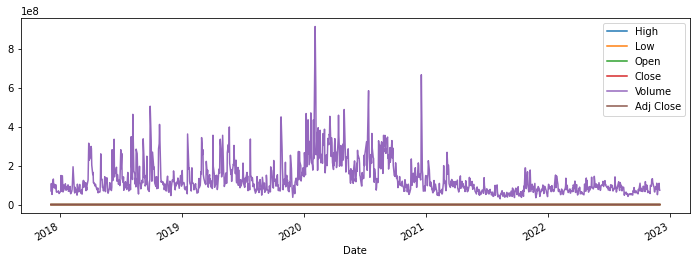

In [9]:
#now lets plot the data in a simple way
#the data can't be understood very well in this way, hence we try various other ways

df_tesla.plot(figsize = (12,4))

<AxesSubplot:xlabel='Date'>

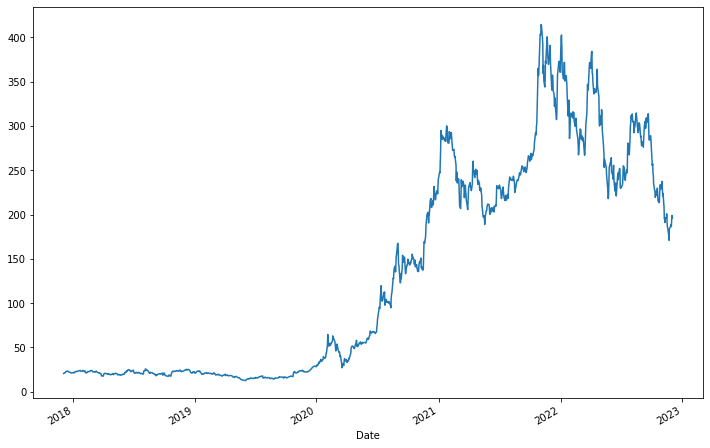

In [10]:
#plot the data in the high column

df_tesla['High'].plot(figsize = (12,8))

<AxesSubplot:xlabel='Date'>

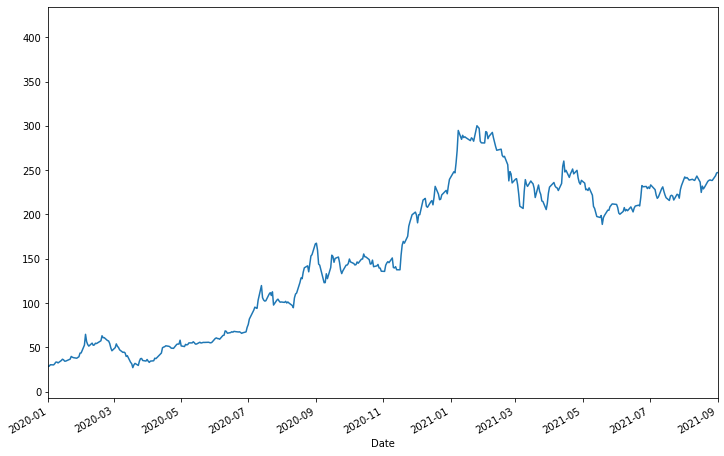

In [11]:
## providing x limit - gives you more control over the x axis
## It allows you to view the change in data over a specific duration of time
## here, we wish to see the change in the stocks from 1st Jan 2020 to 1st Sept 2021

df_tesla['High'].plot(xlim = ['2020-01-01', '2021-09-01'], figsize = (12,8))

<AxesSubplot:xlabel='Date'>

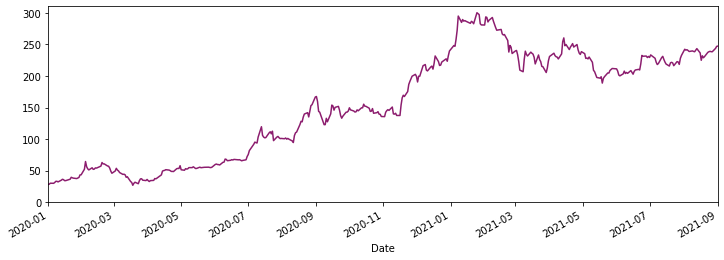

In [12]:
## providing y limit
## here, we have set the range of the Y axis to be from 0 to 310
## the c parameter specifies the color
## ls parameter refers to the line style Eg. ls = '--',

df_tesla['High'].plot(xlim = ['2020-01-01', '2021-09-01'], ylim = [0,310] , figsize = (12,4), c='#8C1D6E')

In [13]:
## index values will give us the specific date values, since here date is the unique feature

df_tesla.index

DatetimeIndex(['2017-12-05', '2017-12-06', '2017-12-07', '2017-12-08',
               '2017-12-11', '2017-12-12', '2017-12-13', '2017-12-14',
               '2017-12-15', '2017-12-18',
               ...
               '2022-11-18', '2022-11-21', '2022-11-22', '2022-11-23',
               '2022-11-25', '2022-11-28', '2022-11-29', '2022-11-30',
               '2022-12-01', '2022-12-02'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [14]:
#to find/ retrive data within a specific time frame, we use the loc function which takes in 2 parameters [start index:end index]

df_tesla.loc['2020-01-01':'2021-09-01']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,28.713333,28.114000,28.299999,28.684000,142981500.0,28.684000
2020-01-03,30.266666,29.128000,29.366667,29.534000,266677500.0,29.534000
2020-01-06,30.104000,29.333332,29.364668,30.102667,151995000.0,30.102667
2020-01-07,31.441999,30.224001,30.760000,31.270666,268231500.0,31.270666
2020-01-08,33.232666,31.215334,31.580000,32.809334,467164500.0,32.809334
...,...,...,...,...,...,...
2021-08-26,238.466660,232.539993,236.103333,233.720001,39642900.0,233.720001
2021-08-27,238.333328,234.033340,235.000000,237.306671,41501400.0,237.306671
2021-08-30,243.666672,237.576660,238.240005,243.636673,55812600.0,243.636673


In [15]:
#appending a .index will give us the indexes

index = df_tesla.loc['2020-01-01':'2021-09-01'].index

In [16]:
## to take into account the open shares between the time period, we do ...

share_open = df_tesla.loc['2020-01-01':'2021-09-01']['Open']
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

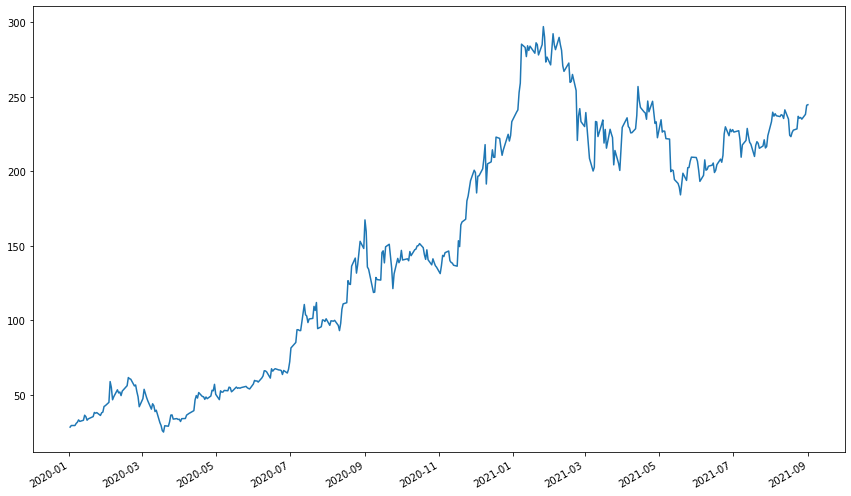

In [17]:
## creating subplots
## here, we have plotted the share_open and index values on the line chart

figure, axis = plt.subplots(figsize = (12,8))
plt.tight_layout()  #overcomes overlapping to some extent

#prevents overlapping completely
figure.autofmt_xdate() 
axis.plot(index, share_open)

In [18]:
## Datetime index

In [19]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-12-05 to 2022-12-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1258 non-null   float64
 1   Low        1258 non-null   float64
 2   Open       1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   float64
 5   Adj Close  1258 non-null   float64
dtypes: float64(6)
memory usage: 101.1 KB


In [20]:
## here the date column is not being displayed as it is being used as an index
## after resetting the index, the date column has been added to the list of columns and we have a new index column
## also, we must keep in mind to convert the date values in the Datetime format (initially it was in the string format)

df_tesla = df_tesla.reset_index()
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Open       1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


In [21]:
pd.to_datetime(df_tesla['Date'])

0      2017-12-05
1      2017-12-06
2      2017-12-07
3      2017-12-08
4      2017-12-11
          ...    
1253   2022-11-28
1254   2022-11-29
1255   2022-11-30
1256   2022-12-01
1257   2022-12-02
Name: Date, Length: 1258, dtype: datetime64[ns]

In [22]:
# a new column has been formed that acts as the index and the Date column is no longer the index

df_tesla

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668
1,2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001
2,2017-12-07,21.242001,20.736668,20.799999,20.749332,71709000.0,20.749332
3,2017-12-08,21.132000,20.750668,20.973333,21.008667,52027500.0,21.008667
4,2017-12-11,21.934000,20.916668,20.975332,21.927334,119070000.0,21.927334
...,...,...,...,...,...,...,...
1253,2022-11-28,188.500000,179.000000,179.960007,182.919998,92905200.0,182.919998
1254,2022-11-29,186.380005,178.750000,184.990005,180.830002,83357100.0,180.830002
1255,2022-11-30,194.759995,180.630005,182.429993,194.699997,109186400.0,194.699997
1256,2022-12-01,198.919998,191.800003,197.080002,194.699997,80046200.0,194.699997


In [23]:
## to reset the date column back as the index, we do ..
## without drop = true, the Date column will appear twice (once as the index, and once as a dataframe column)

df_tesla = df_tesla.set_index('Date', drop = True)
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001
2017-12-07,21.242001,20.736668,20.799999,20.749332,71709000.0,20.749332
2017-12-08,21.132000,20.750668,20.973333,21.008667,52027500.0,21.008667
2017-12-11,21.934000,20.916668,20.975332,21.927334,119070000.0,21.927334
...,...,...,...,...,...,...
2022-11-28,188.500000,179.000000,179.960007,182.919998,92905200.0,182.919998
2022-11-29,186.380005,178.750000,184.990005,180.830002,83357100.0,180.830002
2022-11-30,194.759995,180.630005,182.429993,194.699997,109186400.0,194.699997


In [24]:
datetime.now()  # gives you the current datetime
datetime.now().weekday() # gives you the day of the week
datetime.now().day # gives you the day of the month

5

# Time Resampling

In [25]:
## resample method with rule A - year-end frequency (rule A basically means year-end frequency)
## the min() method will give the the minimum value of High, Low, Open ... for the respective year
## the same applies for the max() method

df_tesla.resample(rule = 'A').min()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,20.533333,20.000000,20.006666,20.246668,52027500.0,20.246668
2018-12-31,17.355333,16.306000,16.851999,16.704000,46210500.0,16.704000
2019-12-31,12.445333,11.799333,12.073333,11.931333,36984000.0,11.931333
2020-12-31,26.990667,23.367332,24.980000,24.081333,52073100.0,24.081333
2021-12-31,188.736664,179.830002,184.183334,187.666672,29401800.0,187.666672
2022-12-31,170.919998,166.190002,168.630005,167.869995,41864700.0,167.869995


<AxesSubplot:xlabel='Date'>

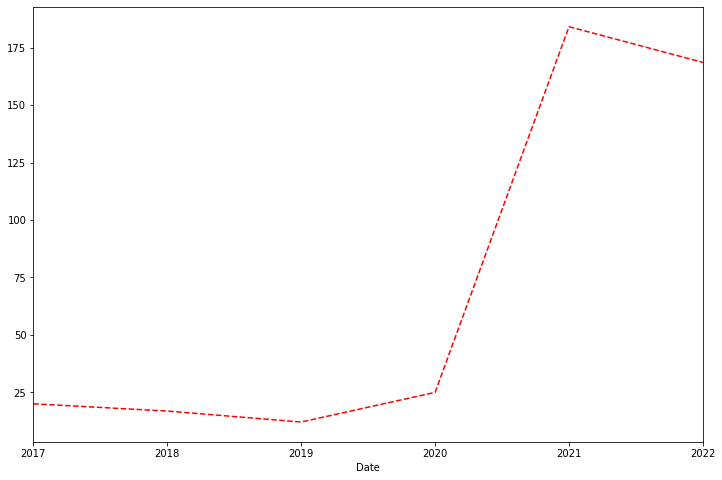

In [26]:
## a sudden rise can be seen in the values of 2021, let's plot that
## we can plot the data obtained using the plot method

df_tesla.resample(rule = 'A').min()['Open'].plot(figsize = (12,8), ls = '--', c = 'red')

In [27]:
df_tesla.resample(rule = 'A').max()

## a sudden rise can be seen in the values of 2020

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,23.162666,22.505333,22.993334,22.896667,130998000.0,22.896667
2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-31,402.666656,378.679993,396.516663,399.926666,151565700.0,399.926666


<AxesSubplot:xlabel='Date'>

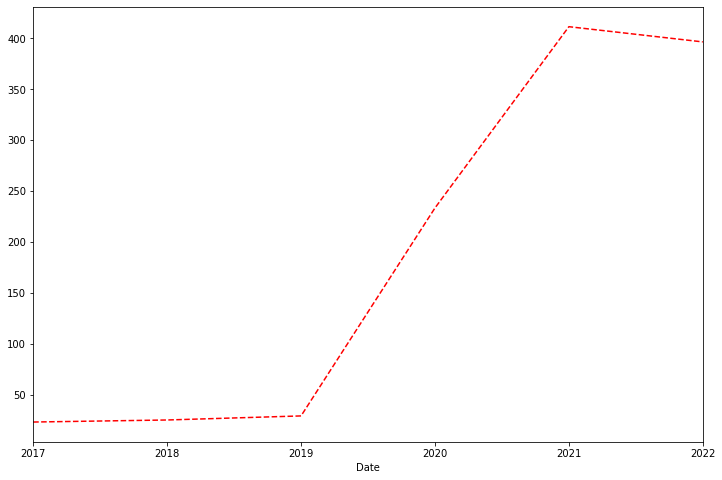

In [28]:
## we can plot the data obtained using the plot method

df_tesla.resample(rule = 'A').max()['Open'].plot(figsize = (12,8), ls = '--', c = 'red')

In [29]:
## quaterly start frequency - will show us the max data with respect to quaters of the year
## rule implied is 'QS'

df_tesla.resample(rule = 'QS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-01,23.162666,22.505333,22.993334,22.896667,130998000.0,22.896667
2018-01-01,24.033333,23.490667,24.000000,23.827999,315021000.0,23.827999
2018-04-01,24.915333,23.633333,24.344000,24.722000,335211000.0,24.722000
2018-07-01,25.830667,24.474667,24.606001,25.304667,504745500.0,25.304667
2018-10-01,25.299334,24.450001,25.000000,25.119333,411382500.0,25.119333
2019-01-01,23.466667,22.943333,23.080667,23.153999,362262000.0,23.153999
2019-04-01,19.744667,19.144667,19.219999,19.454000,398206500.0,19.454000
2019-07-01,17.738001,17.210667,17.278000,17.658667,336274500.0,17.658667
2019-10-01,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334


<AxesSubplot:xlabel='Date'>

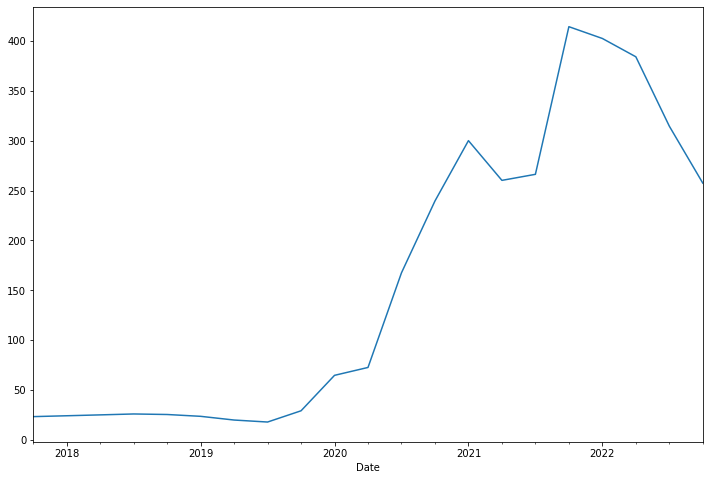

In [30]:
df_tesla.resample(rule = 'QS').max()['High'].plot(figsize = (12,8))

In [31]:
## business end frequency
## rule implied is 'BA'

df_tesla.resample(rule = 'BA').max()

## the date is 29, 31, 30 differing according to the date when the business year ended that year

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,23.162666,22.505333,22.993334,22.896667,130998000.0,22.896667
2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-30,402.666656,378.679993,396.516663,399.926666,151565700.0,399.926666


<AxesSubplot:xlabel='Date'>

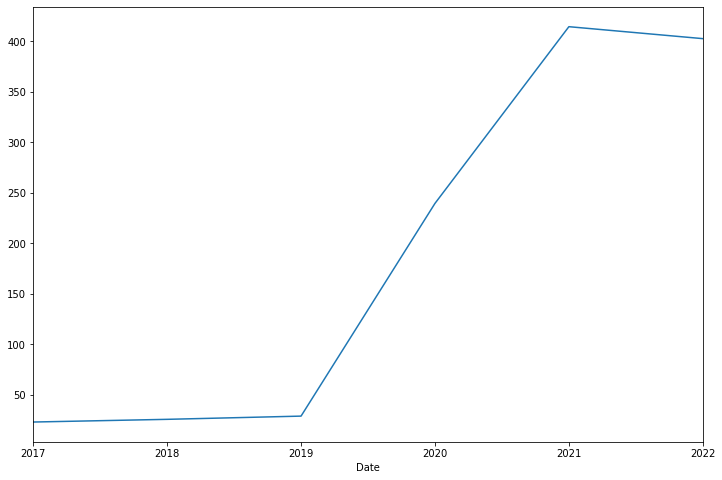

In [32]:
df_tesla.resample(rule = 'BA').max()['High'].plot(figsize = (12,8))

In [33]:
## business Quater Start frequency
## rule implied is 'BQS'

df_tesla.resample(rule = 'BQS').max()

## the date is 1, 2, 3 differing according to the date when the business quarter started that year

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-02,23.162666,22.505333,22.993334,22.896667,130998000.0,22.896667
2018-01-01,24.033333,23.490667,24.000000,23.827999,315021000.0,23.827999
2018-04-02,24.915333,23.633333,24.344000,24.722000,335211000.0,24.722000
2018-07-02,25.830667,24.474667,24.606001,25.304667,504745500.0,25.304667
2018-10-01,25.299334,24.450001,25.000000,25.119333,411382500.0,25.119333
2019-01-01,23.466667,22.943333,23.080667,23.153999,362262000.0,23.153999
2019-04-01,19.744667,19.144667,19.219999,19.454000,398206500.0,19.454000
2019-07-01,17.738001,17.210667,17.278000,17.658667,336274500.0,17.658667
2019-10-01,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334


<AxesSubplot:xlabel='Date'>

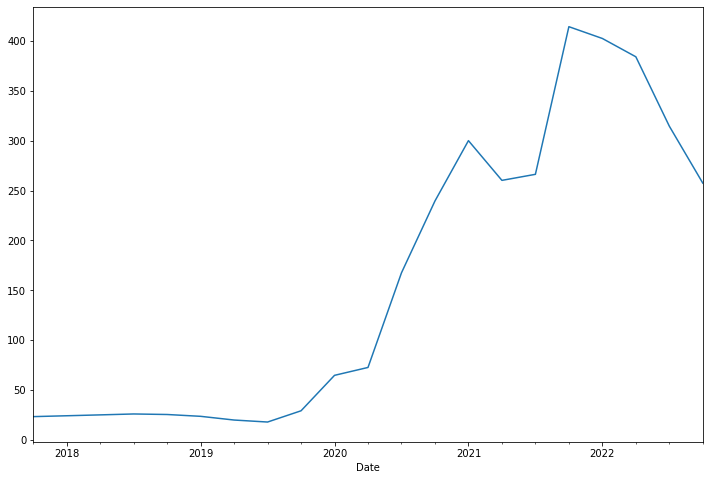

In [34]:
df_tesla.resample(rule = 'BQS').max()['High'].plot(figsize = (12,8))

# Plotting

<AxesSubplot:xlabel='Date'>

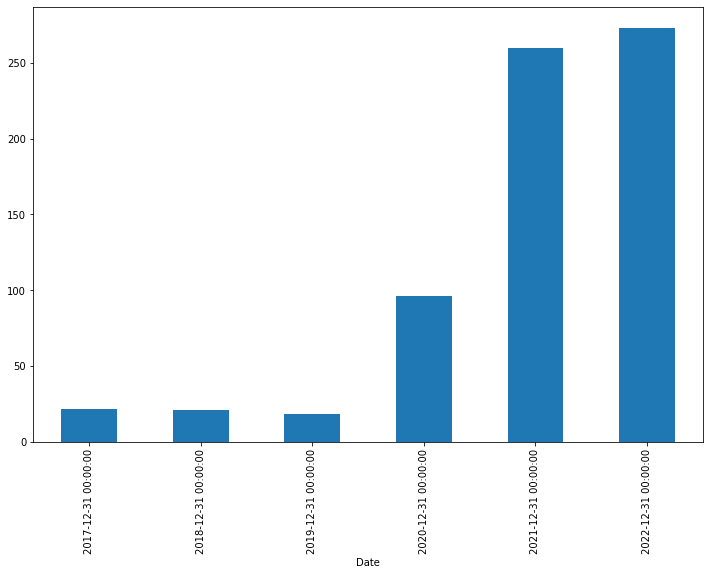

In [35]:
## we can also resample individual columns and plot the data for them. Here we have taken the Open column into 
##consideration and the mean is plotted in the form of a bar chart

df_tesla['Open'].resample(rule = 'A').mean().plot(kind = 'bar', figsize = (12, 8))

<AxesSubplot:xlabel='Date'>

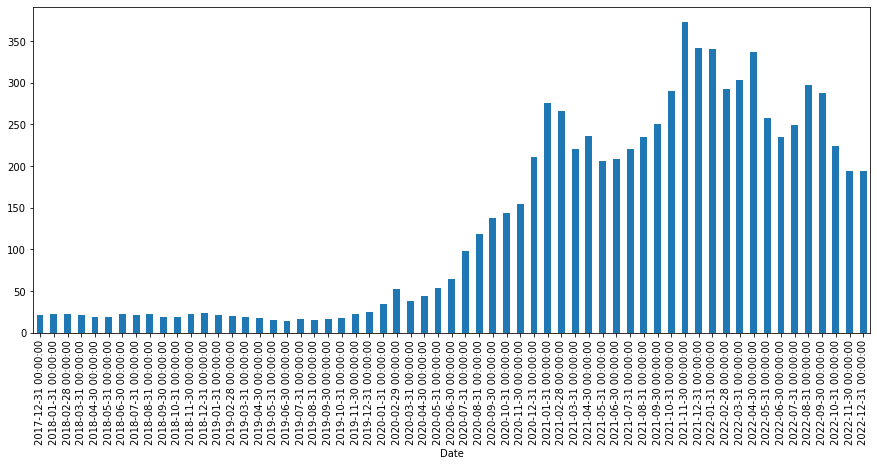

In [36]:
## plotting the mean of the 'Open' column on a monthly basis
## we can see that there is an amazing rise in the stock prices since July 2020

df_tesla['Open'].resample(rule = 'M').mean().plot(kind = 'bar', figsize = (15, 6))

# Rolling windows

In [37]:
# rolling() function provides the feature of rolling window calculations. 
# In very simple words we take a window size of k at a time and perform some desired mathematical operation on it. 
# A window of size k means k consecutive values at a time. In a very simple case, all the ‘k’ values are equally weighted.
#Also helps in data smoothening

df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001
2017-12-07,21.242001,20.736668,20.799999,20.749332,71709000.0,20.749332
2017-12-08,21.132000,20.750668,20.973333,21.008667,52027500.0,21.008667
2017-12-11,21.934000,20.916668,20.975332,21.927334,119070000.0,21.927334


In [38]:
# the rolling window has a size of 10
# the first 10 values are considered as equal and are hence given as NaN, and the rolling mean is calculated

df_tesla['Open'].rolling(10).mean().head(20)

Date
2017-12-05          NaN
2017-12-06          NaN
2017-12-07          NaN
2017-12-08          NaN
2017-12-11          NaN
2017-12-12          NaN
2017-12-13          NaN
2017-12-14          NaN
2017-12-15          NaN
2017-12-18    21.617733
2017-12-19    21.872800
2017-12-20    22.090067
2017-12-21    22.207333
2017-12-22    22.306733
2017-12-26    22.368067
2017-12-27    22.271733
2017-12-28    22.077200
2017-12-29    21.911667
2018-01-02    21.711400
2018-01-03    21.552067
Name: Open, dtype: float64

In [39]:
# Creating a new column for 30 days of rolling
# we calculate the mean average using the rolling window

df_tesla['Open : 30 days of rolling'] = df_tesla['Open'].rolling(30).mean()

In [40]:
df_tesla.head(31)

,High,Low,Open,Close,Volume,Adj Close,Open : 30 days of rolling
Date,,,,,,,
2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668,NaN
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001,NaN
2017-12-07,21.242001,20.736668,20.799999,20.749332,71709000.0,20.749332,NaN
2017-12-08,21.132000,20.750668,20.973333,21.008667,52027500.0,21.008667,NaN
2017-12-11,21.934000,20.916668,20.975332,21.927334,119070000.0,21.927334,NaN
2017-12-12,22.762667,22.002001,22.030001,22.735332,130998000.0,22.735332,NaN
2017-12-13,22.948000,22.433332,22.728666,22.601999,93322500.0,22.601999,NaN
2017-12-14,23.162666,22.459999,22.733999,22.525999,86998500.0,22.525999,NaN
2017-12-15,22.926666,22.384001,22.802668,22.896667,103998000.0,22.896667,NaN


<AxesSubplot:xlabel='Date'>

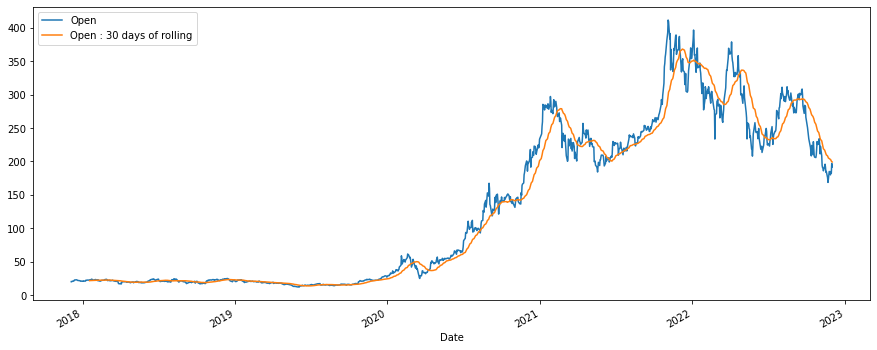

In [41]:
df_tesla[['Open','Open : 30 days of rolling']].plot(figsize = (15,6))

## here we can see that the data in the rolling column is comparatively smoother

# Simple Moving average

SMA is the easiest moving average to construct. It is simply the average price over the specified period. The average is called "moving" because it is plotted on the chart bar by bar, forming a line that moves along the chart as the average value changes. Smoothens the graph.

Data smoothing is done by using an algorithm to remove noise from a data set. This allows important patterns to more clearly stand out. Data smoothing can be used to help predict trends.

<AxesSubplot:xlabel='Date'>

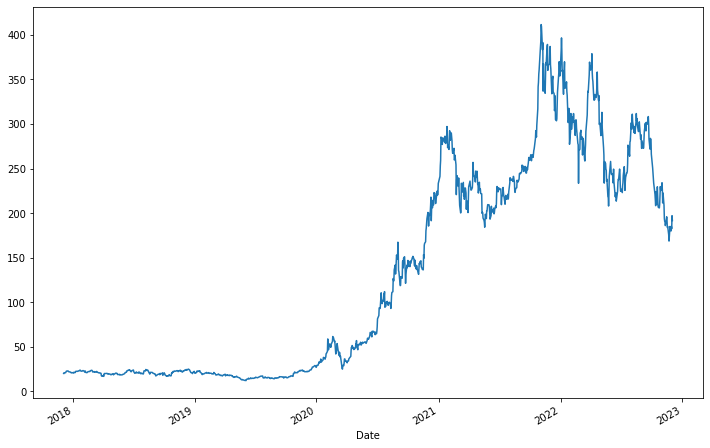

In [42]:
df_tesla['Open'].plot(figsize = (12,8))

<AxesSubplot:xlabel='Date'>

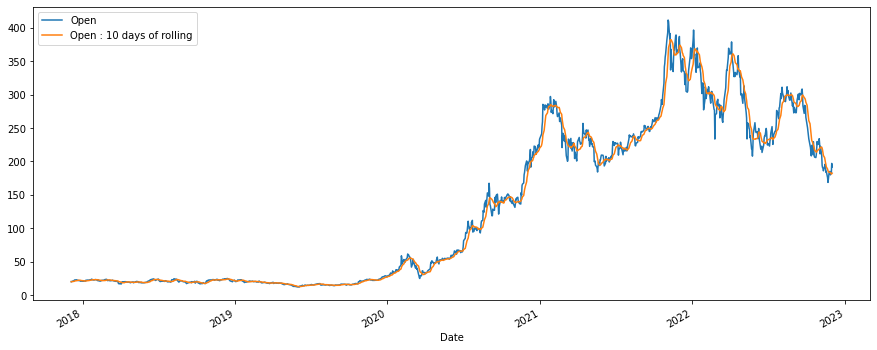

In [43]:
## here we are trying to see the rolling SMA of the data with a rolling window of 10
## min_periods refers to the minimum number of observations in window required to have a value

df_tesla['Open : 10 days of rolling']=df_tesla['Open'].rolling(window = 10, min_periods = 1).mean()

df_tesla[['Open','Open : 10 days of rolling']].plot(figsize = (15,6))

<AxesSubplot:xlabel='Date'>

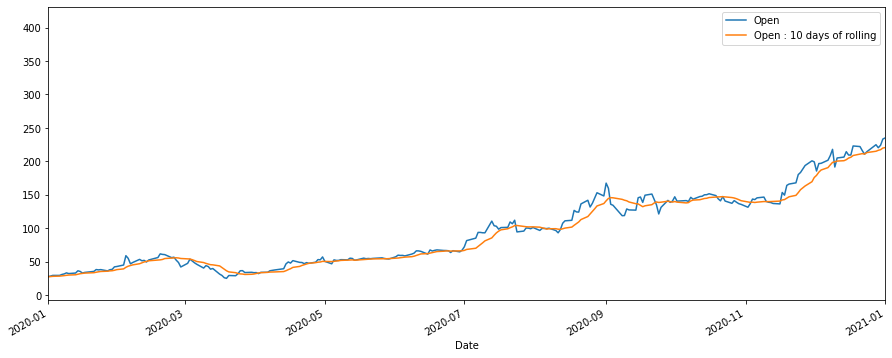

In [44]:
## in the above output the difference is not clearly visible, hence we set a specific time frame for data retrieval
## here it is between 1st Jan 2020 to 1st Jan 2021
## we can clearly see the difference between the 2 values i.e. OPen and Open: 10 days of rolling
## the data in the second field is comparatively smoother

df_tesla[['Open','Open : 10 days of rolling']].plot(xlim = ['2020-01-01','2021-01-01'], figsize = (15,6))

In [45]:
df_tesla['Open : 20 days of rolling']=df_tesla['Open'].rolling(window = 20, min_periods = 1).mean()

df_tesla['Open : 50 days of rolling']=df_tesla['Open'].rolling(window = 50, min_periods = 1).mean()


<AxesSubplot:xlabel='Date'>

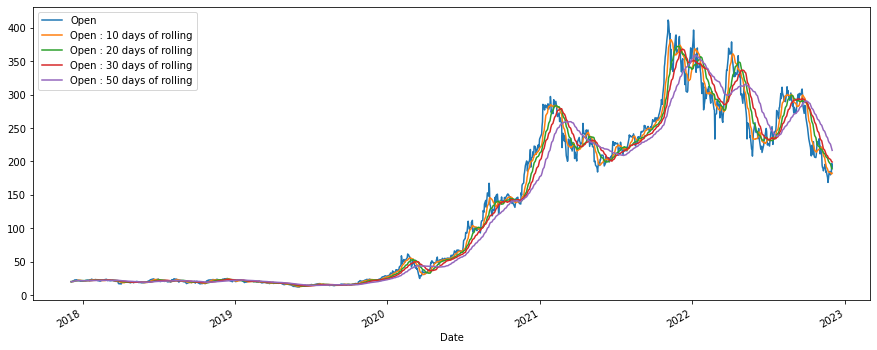

In [46]:
df_tesla[['Open','Open : 10 days of rolling','Open : 20 days of rolling','Open : 30 days of rolling','Open : 50 days of rolling']].plot(figsize = (15,6))

<AxesSubplot:xlabel='Date'>

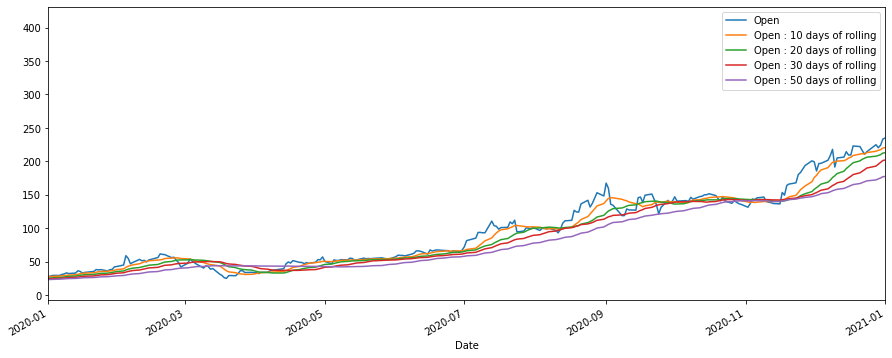

In [47]:
df_tesla[['Open','Open : 10 days of rolling','Open : 20 days of rolling','Open : 30 days of rolling','Open : 50 days of rolling']].plot(xlim = ['2020-01-01','2021-01-01'], figsize = (15,6))

# Cumulative moving Average

The Cumulative Moving Average is the unweighted mean of the previous values up to the current time t. The simple moving average has a sliding window of constant size M. On the contrary, the window size becomes larger as the time passes when computing the cumulative moving average.

<AxesSubplot:xlabel='Date'>

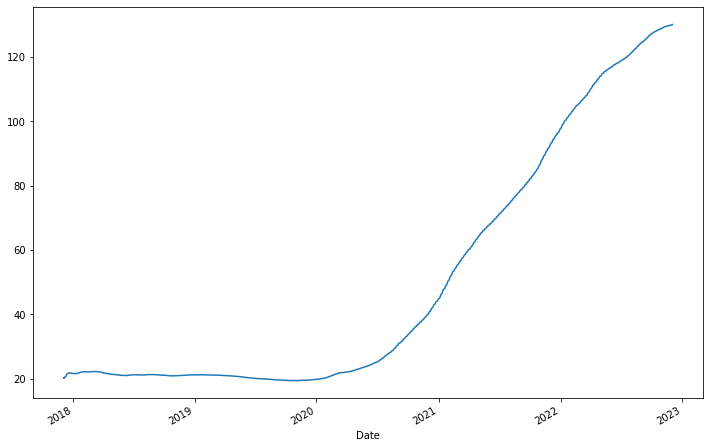

In [48]:
##The expanding() function is used to provide expanding transformations. Minimum number of observations in window 
##required to have a value (otherwise result is NA). Set the labels at the center of the window.

df_tesla['Open'].expanding().mean().plot(figsize = (12,8))

In [49]:
df_tesla = df_tesla.drop(['Open : 30 days of rolling', 'Open : 10 days of rolling', 'Open : 20 days of rolling', 'Open : 50 days of rolling'], axis=1)
df_tesla


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001
2017-12-07,21.242001,20.736668,20.799999,20.749332,71709000.0,20.749332
2017-12-08,21.132000,20.750668,20.973333,21.008667,52027500.0,21.008667
2017-12-11,21.934000,20.916668,20.975332,21.927334,119070000.0,21.927334
...,...,...,...,...,...,...
2022-11-28,188.500000,179.000000,179.960007,182.919998,92905200.0,182.919998
2022-11-29,186.380005,178.750000,184.990005,180.830002,83357100.0,180.830002
2022-11-30,194.759995,180.630005,182.429993,194.699997,109186400.0,194.699997


# ARIMA - Autoregressive Integrated Moving Average

ARIMA models use differencing to convert a non-stationary time series into a stationary one, and then predict future values from historical data.

In [50]:
from statsmodels.tsa.stattools import adfuller

In [51]:
## Augmented Dickey Fuller test ( ADF Test) is a common statistical test used to test whether a given Time series is stationary 
## or not .

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [52]:
adf_test(df_tesla['Open'])

ADF Statistics: -1.162245188195456
p- value: 0.6896224759590843
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [53]:
## Use Techniques Differencing
## one month difference

df_tesla['Open : First Difference']=df_tesla['Open']-df_tesla['Open'].shift(1)
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Open : First Difference
Date,,,,,,,
2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668,NaN
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001,-0.126667
2017-12-07,21.242001,20.736668,20.799999,20.749332,71709000.0,20.749332,0.793333
2017-12-08,21.132000,20.750668,20.973333,21.008667,52027500.0,21.008667,0.173334
2017-12-11,21.934000,20.916668,20.975332,21.927334,119070000.0,21.927334,0.001999


In [54]:
adf_test(df_tesla['Open : First Difference'].dropna())

ADF Statistics: -6.5220898923439465
p- value: 1.0361028845723732e-08
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [55]:
## Use Techniques Differencing
## one month difference

df_tesla['Open : Second Difference']=df_tesla['Open : First Difference']-df_tesla['Open : First Difference'].shift(1)
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Open : First Difference,Open : Second Difference
Date,,,,,,,,
2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668,NaN,NaN
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001,-0.126667,NaN
2017-12-07,21.242001,20.736668,20.799999,20.749332,71709000.0,20.749332,0.793333,0.920000
2017-12-08,21.132000,20.750668,20.973333,21.008667,52027500.0,21.008667,0.173334,-0.619999
2017-12-11,21.934000,20.916668,20.975332,21.927334,119070000.0,21.927334,0.001999,-0.171335


In [56]:
adf_test(df_tesla['Open : Second Difference'].dropna())

ADF Statistics: -13.611089356055704
p- value: 1.872633276980596e-25
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [57]:
## Use Techniques Differencing
## 10 months difference

df_tesla['Open : 10 Difference']=df_tesla['Open']-df_tesla['Open'].shift(10)
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Open : First Difference,Open : Second Difference,Open : 10 Difference
Date,,,,,,,,,
2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668,NaN,NaN,NaN
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001,-0.126667,NaN,NaN
2017-12-07,21.242001,20.736668,20.799999,20.749332,71709000.0,20.749332,0.793333,0.920000,NaN
2017-12-08,21.132000,20.750668,20.973333,21.008667,52027500.0,21.008667,0.173334,-0.619999,NaN
2017-12-11,21.934000,20.916668,20.975332,21.927334,119070000.0,21.927334,0.001999,-0.171335,NaN


In [58]:
adf_test(df_tesla['Open : 10 Difference'].dropna())

ADF Statistics: -5.772582004741484
p- value: 5.349698317129188e-07
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [59]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

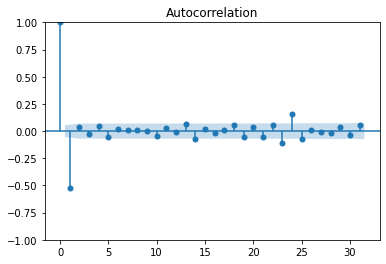

In [60]:
acf = plot_acf(df_tesla['Open : Second Difference'].dropna())


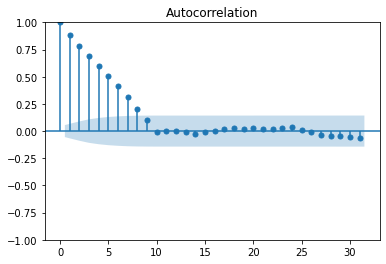

In [61]:
acf12 = plot_acf(df_tesla['Open : 10 Difference'].dropna())

C:\Python\Python3.10.2\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


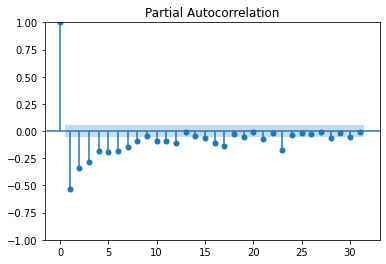

In [62]:
result = plot_pacf(df_tesla['Open : Second Difference'].dropna())

C:\Python\Python3.10.2\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


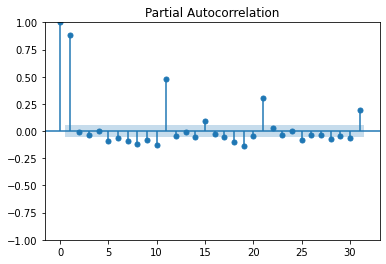

In [63]:
pacf12 = plot_pacf(df_tesla['Open : 10 Difference'].dropna())

In [64]:
from datetime import datetime,timedelta
tesla_dataset_end=datetime(2020,1,1)
test_dataset_end=datetime(2021,1,1)

In [65]:
train_data=df_tesla[:tesla_dataset_end]
test_data=df_tesla[tesla_dataset_end+timedelta(days=1):test_dataset_end]

In [66]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [67]:
test_data

,High,Low,Open,Close,Volume,Adj Close,Open : First Difference,Open : Second Difference,Open : 10 Difference
Date,,,,,,,,,
2020-01-02,28.713333,28.114000,28.299999,28.684000,142981500.0,28.684000,1.299999,2.886000,3.033998
2020-01-03,30.266666,29.128000,29.366667,29.534000,266677500.0,29.534000,1.066668,-0.233332,3.991333
2020-01-06,30.104000,29.333332,29.364668,30.102667,151995000.0,30.102667,-0.001999,-1.068666,2.876667
2020-01-07,31.441999,30.224001,30.760000,31.270666,268231500.0,31.270666,1.395332,1.397331,3.407333
2020-01-08,33.232666,31.215334,31.580000,32.809334,467164500.0,32.809334,0.820000,-0.575333,4.128000
...,...,...,...,...,...,...,...,...,...
2020-12-24,222.029999,213.666672,214.330002,220.589996,68596800.0,220.589996,3.596664,8.863327,22.873337
2020-12-28,227.133331,220.266663,224.836670,221.229996,96835800.0,221.229996,10.506668,6.910004,19.833344
2020-12-29,223.300003,218.333328,220.333328,221.996674,68732400.0,221.996674,-4.503342,-15.010010,14.000000


In [68]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [69]:

train_data






,High,Low,Open,Close,Volume,Adj Close,Open : First Difference,Open : Second Difference,Open : 10 Difference
Date,,,,,,,,,
2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668,NaN,NaN,NaN
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001,-0.126667,NaN,NaN
2017-12-07,21.242001,20.736668,20.799999,20.749332,71709000.0,20.749332,0.793333,0.920000,NaN
2017-12-08,21.132000,20.750668,20.973333,21.008667,52027500.0,21.008667,0.173334,-0.619999,NaN
2017-12-11,21.934000,20.916668,20.975332,21.927334,119070000.0,21.927334,0.001999,-0.171335,NaN
...,...,...,...,...,...,...,...,...,...
2019-12-24,28.364668,27.512667,27.890667,28.350000,120820500.0,28.350000,0.438667,0.339334,5.226667
2019-12-26,28.898666,28.423332,28.527332,28.729334,159508500.0,28.729334,0.636665,0.197998,5.068665
2019-12-27,29.020666,28.407333,29.000000,28.691999,149185500.0,28.691999,0.472668,-0.163998,5.338667


In [70]:
model_ARIMA=ARIMA(train_data['Open'],order=(0,2,0))


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
model_Arima_fit = model_ARIMA.fit()

In [ ]:
model_Arima_fit.summary()

In [ ]:
test_data

In [ ]:
#prediction

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]


print(pred_start_date)
print(pred_end_date)

In [ ]:
pred = model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
